Задача №2 
Требуется реализовать на языке Python алгоритм градиентного спуска для решения задачи регрессии. Также требуется в алгоритм добавить возможность ограничения по весу признаков в произвольных диапазонах во время процесса оптимизации.


Для решения задачи возьмем классический алгоритм *стохастического градиентного спуска(SGD)* с добавлением в него *Lasso(L1)* и *Ridge(L2)* регуляризаций.
Для оценки будем использовать *средний квадрат ошибки(MSE)*.

Импортуруем нужные для работы библиотеки:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Для реализациии SGD из входных данных нам потребуется массив признаков*(X)*, массив таргетов*(y)*, число иттераций для спуска*(max iter)*, шаг обучения*(lr)*.
В функции значения "max iter" и "lr" зададим произвольным стандартным значениям для того чтобы алгоритм мог работать без задания их в вызове функции.
Для включения регуляризаций введем булеву переменную*(regularization)* для включения*(True)* и выключения*(False)* соотвественно. 

Реализация стохастического градиентного спуска с L1 и L2 регуляризациями:

In [2]:
def My_grad_desccent(X, y, lr=1e-4, max_iter=100, regularization=False, l1=10, l2=10):
    w = np.zeros(len(X[0]))
    n = len(y)
    error = np.array([])
    if regularization is True:
        for iter in range(max_iter):
            y_hat = X @ w
            w = w - lr * (X.T @ (y_hat - y) + l1 * np.sign(w) + 2 * l2 * w)
            error = np.append(error, MSE(X, y, w))
    else:
        for iter in range(max_iter):
            y_hat = X @ w
            w = w - lr * 1 / n * X.T @ (y_hat - y)
            error = np.append(error, MSE(X, y, w))
    return (w, error, y_hat)

Реализация функции для нахождения среднего квадрата ошибки:
\
$$\displaystyle\frac{1}{n}\sum_{i=0}^{n-1} (\widehat{y_i} - y_i)^2
$$



In [3]:
def MSE(X, y, w):
    return 1 / len(y) * np.sum(np.square(X @ w - y))

In [39]:
np.random.seed(42)
dataset = np.random.randint(1, 9, size=(7, 5))
target = np.random.randint(1, 9, len(dataset))
w, error, pred = My_grad_desccent(dataset, target, lr=1e-4, max_iter=1000, regularization=False)

Выведем значения сгенерированного датасета, матрицы весов, ошибку регулирования, массив предсказаний и сгенерированных таргетов:

In [44]:
print('dataset =\n', dataset)
print('\nw =\n', w.reshape(-1, 1), '\n\nerror =', error[-1])
print('\ny_pred =\n', pred.reshape(-1, 1), '\ny =\n', target.reshape(-1, 1))

dataset =
 [[7 4 5 7 3]
 [8 5 5 7 2]
 [3 7 3 3 8]
 [5 4 8 8 3]
 [6 5 2 8 4]
 [6 6 2 8 4]
 [5 1 4 2 6]]

w =
 [[ 1.08356057]
 [-0.65258292]
 [-0.13820263]
 [-0.19025576]
 [ 0.45289694]] 

error = 0.19694036243335633

y_pred =
 [[4.31024457]
 [4.28833709]
 [1.32097453]
 [1.53938808]
 [3.25131604]
 [2.59894535]
 [6.54829225]] 
y =
 [[5]
 [4]
 [1]
 [1]
 [3]
 [3]
 [7]]


Визуализируем работу оптимизатора для случая с включенной и выключенной регуляризациями:

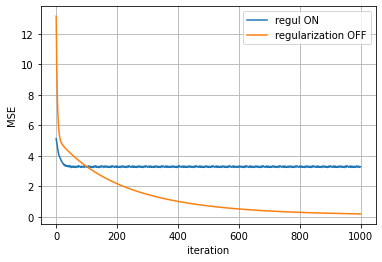

In [42]:
w, error, pred = My_grad_desccent(dataset, target, lr=1e-3, max_iter=1000, regularization=True)
plt.plot(np.arange(len(error)), error);
w, error, pred = My_grad_desccent(dataset, target, lr=1e-3, max_iter=1000, regularization=False)

plt.plot(np.arange(len(error)), error)
plt.grid()
plt.ylabel('MSE');plt.xlabel('iteration')
plt.legend(('regul ON', 'regularization OFF'))
plt.show()